# CHAPTER 28: Bayesian inference

### This code generates figures 1, 3, 4, and 6 from Chapter 28:  Bayesian Inference (vol II)
TEXT: A. H. Sayed, INFERENCE AND LEARNING FROM DATA, Cambridge University Press, 2022.

<div style="text-align: justify">
DISCLAIMER:  This computer code is  provided  "as is"   without  any  guarantees.
Practitioners  should  use it  at their own risk.  While  the  codes in  the text 
are useful for instructional purposes, they are not intended to serve as examples 
of full-blown or optimized designs. The author has made no attempt at optimizing 
the codes, perfecting them, or even checking them for absolute accuracy. In order 
to keep the codes at a level  that is  easy to follow by students, the author has 
often chosen to  sacrifice  performance or even programming elegance in  lieu  of 
simplicity. Students can use the computer codes to run variations of the examples 
shown in the text. 
</div>

The Jupyter notebook and python codes are developed by Eduardo Faria Cabrera

required libraries:
    
1. numpy
2. matplotlib
3. scipy

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import gamma
from matplotlib.patches import FancyArrowPatch
import scipy

## Example 28.2 (Election Poll)

Two candidates $\mathbb{A}$ and $\mathbb{B}$ are running for office in a local district election. The probability of success for candidate $\mathbb{A}$ is $p$. We survey a fraction of the voters in the district, say, a number of $N$ potential voters, and ask them whether they will be voting for one candidate or the other. We would like to use the result of the survey to estimate $p$, i.e., the likelihood of success for candidate $\mathbb{A}$.

Let $y$ denote a binomial variable with parameters $N$ and $p$. The probability of observing $y$ successes in $N$ trials (i.e., the probability of obtaining $y$ positive answers in favor of candidate $\mathbb{A}$ out of $N$) is given by the expression:

$\mathbb{P}(\textbf{y}=y)=\dbinom{N}{y}p^y (1-p)^{N-y},\;\;\;y=0,1,\ldots,N $

The value of the parameter $p$ can be estimated in a number of ways, for example, by using a MSE formulation (as described in Prob. 28.12), or a maximum-likelihood formulation (as discussed in Prob. 31.8), or a  MAP formulation. In this example, we focus on the MAP approach.

In Bayesian inference, we treat the quantities we wish to estimate as random variables. For this reason, we will need to model $p$ as a random variable  and then determine an expression for the conditional pdf, $f_{p|y}(p|y)$. Once this pdf is computed, its peak location will provide the desired MAP estimate, $\widehat{p}_{\rm MAP}$. 

Treating $p$ as random requires that we specify its distribution, $f_{p}(p)$, also called the {\em prior}.  Since the value of $p$ is confined to the interval $[0,1]$, we can select the prior from the family of {\em beta distributions}. This family is useful in modeling random variables that are confined to $\textit{finite}$ intervals. The beta distribution is defined by two positive $\textit{shape parameters}$ $(a,b)$ as follows:

$f_{p}(p; a, b) =
\begin{cases}
\displaystyle \frac{\Gamma(a + b)}{\Gamma(a)\Gamma(b)}\,p^{a - 1}(1 - p)^{b - 1},  & 0 \le p \le 1 \\
\quad\quad 0, & \textit{otherwise} \\
\end{cases}
$

where $\Gamma(x)$ denotes the gamma function defined earlier in Prob. 4.3. Different choices for $(a,b)$ result in different behavior for the distribution $f_{p}(p)$. For example, the uniform distribution over the interval $[0,1]$ corresponds to the choice $a=b=1$. In this case, the variable $p$ is equally likely to assume any value within the interval. Other values for $a$ and $b$ will give more likelihood to smaller or larger values in the interval. The top part of  Fig. 28.1 plots some typical curves for the beta distribution.

/var/folders/p2/0dtgky191vs6xtnsc_hr94z80000gp/T/ipykernel_1302/1527585226.py:16: RuntimeWarning: divide by zero encountered in power
  f4 = (gamma(a4+b4)/(gamma(a4)*gamma(b4)))*(x**(a4-1))*(1-x)**(b4-1)


Probability of success: 0.23779393237753424


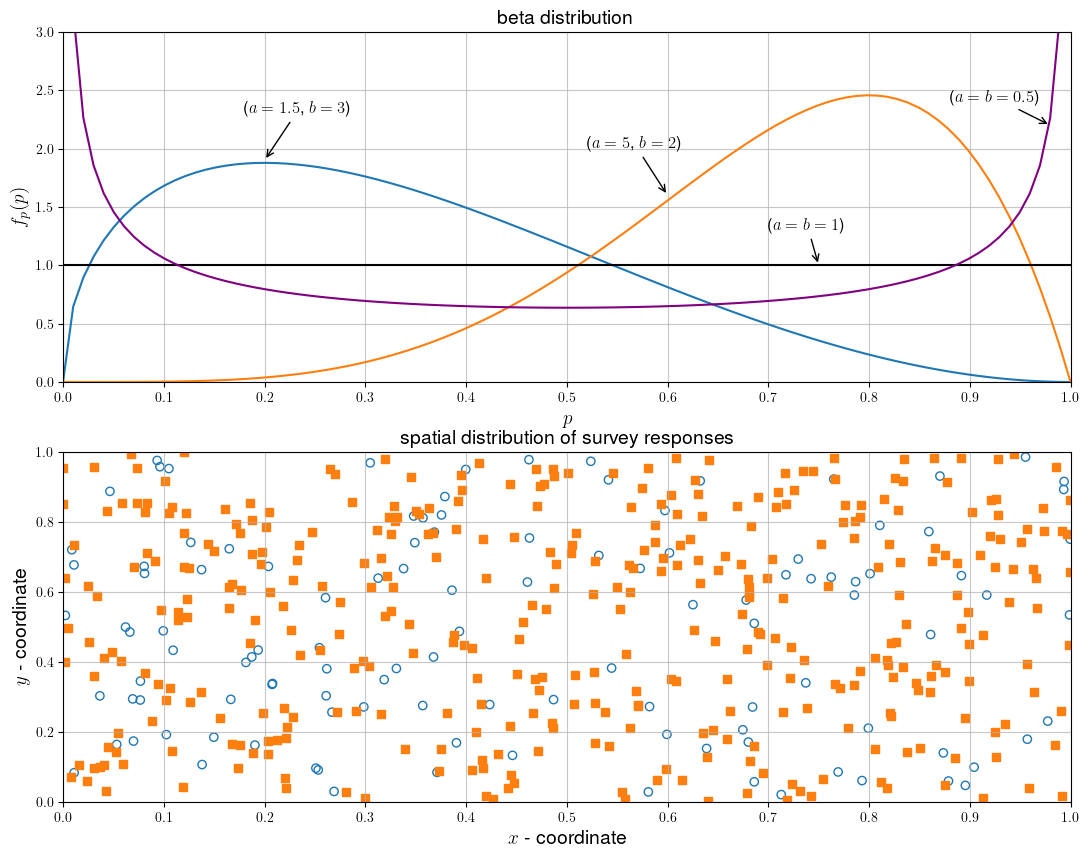

number of votes in favor of candidate A: 116
probability of success, its MAP estimate, and its sample estimate: 0.23779393237753424, 0.23366336633663368, 0.232


In [2]:
#beta distributions
n = 1 #parameters of beta distribution
a1 = 1.5
b1 = 3
a2 = 5
b2 = 2
a3 = 1
b3 = 1
a4 = 0.5
b4 = 0.5

x = np.linspace(0, 1, 100)
f1 = (gamma(a1+b1)/(gamma(a1)*gamma(b1)))*(x**(a1-1))*(1-x)**(b1-1)
f2 = (gamma(a2+b2)/(gamma(a2)*gamma(b2)))*(x**(a2-1))*(1-x)**(b2-1)
f3 = (gamma(a3+b3)/(gamma(a3)*gamma(b3)))*(x**(a3-1))*(1-x)**(b3-1)
f4 = (gamma(a4+b4)/(gamma(a4)*gamma(b4)))*(x**(a4-1))*(1-x)**(b4-1)

#figure 1 (election poll)
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "sans-serif",
    "font.sans-serif": "Helvetica",
})

plt.rcParams['figure.figsize']=13,7
fig = plt.figure()

plt.subplots_adjust(bottom=0.1, top=1.2)

ax = fig.add_subplot(211)
ax.plot(x, f1)
ax.plot(x, f2)
ax.plot(x, f3, color="black")
ax.plot(x, f4, color="purple")
ax.set_xlabel(r'$p$', fontsize=14)
ax.set_ylabel(r'$f_{p}(p)$', fontsize=14)
ax.set_ylim([0, 3])
ax.set_xlim([0, 1])
plt.xticks(np.arange(0, 1.1, 0.1))
ax.grid(alpha=0.7)
ax.set_title('beta distribution', fontsize=14)

ax.annotate("($a=1.5$, $b=3$)", xy=(0.2, 1.9), xytext=(0.18, 2.3), arrowprops=dict(arrowstyle="->", connectionstyle="arc3"), fontsize=12, fontweight='bold')
ax.annotate("($a=5$, $b=2$)", xy=(0.6, 1.6), xytext=(0.52, 2), arrowprops=dict(arrowstyle="->", connectionstyle="arc3"), fontsize=12, fontweight='bold')
ax.annotate("($a=b=1$)", xy=(0.75, 1), xytext=(0.70, 1.3), arrowprops=dict(arrowstyle="->", connectionstyle="arc3"), fontsize=12, fontweight='bold')
ax.annotate("($a=b=0.5$)", xy=(0.98, 2.2), xytext=(0.88, 2.4), arrowprops=dict(arrowstyle="->", connectionstyle="arc3"), fontsize=12, fontweight='bold')

a = 3
b = 4
p = np.random.beta(a, b) #generate probability of success for candidate A from a beta distribution(5,2)

print(f"Probability of success: {p}")

N = 500 #number of sample points
x = np.random.uniform(0, 1, N) #a random number between 0 and 1;

nA = (x < p).sum() #number of votes for candidate A
nB = (x >= p).sum() #number of votes for candidate B
data = (x < p)

YA = np.random.uniform(0, 1, (1, nA)) #coordinates for candidate A locations
XA = np.random.uniform(0, 1, (1, nA))
YB = np.random.uniform(0, 1, (1, nB)) #oordinates for candidate B locations
XB = np.random.uniform(0, 1, (1, nB))

p_MAP = (nA+a-1)/(N+a+b-2)
sample_estimate = nA/N

ax = fig.add_subplot(212)
ax.scatter(XA, YA, marker="o", facecolors="none", edgecolors="tab:blue")
ax.scatter(XB, YB, marker="s", color="tab:orange")
ax.set_xlabel(r'$x$ - coordinate', fontsize=14)
ax.set_ylabel(r'$y$ - coordinate', fontsize=14)
ax.set_ylim([0, 1])
ax.set_xlim([0, 1])
plt.xticks(np.arange(0, 1.1, 0.1))
ax.grid(alpha=0.7)
ax.set_title('spatial distribution of survey responses', fontsize=14)

plt.show()


print(f"number of votes in favor of candidate A: {nA}")
print(f"probability of success, its MAP estimate, and its sample estimate: {p}, {p_MAP}, {sample_estimate}")

**Figure $28.1$** {$\textit{Top}$) Plots of several beta distributions for different values of the shape parameters $(a,b)$. Observe how $a=b=1$ results in the uniform distribution, while other values for $(a,b)$  give more likelihood to smaller or larger values within the interval $[0,1]$. ($\textit{Bottom}$) Results of polling $N=500$ likely voters. The colors refer to votes for candidates $\mathbb{A}$ or  $\mathbb{B}$.

The mean and variance of the beta distribution (28.20)  are known to be:

$\bar{p} = \frac{a}{a + b}, \qquad \sigma_p^2 = \frac{ab}{(a + b)^2(a + b + 1)}$

When $a>0$ and $b>0$, the mode of the distribution is also known  to occur at

${ \textit{\rm mode}}=\frac{a-1}{a+b-2}$

Using these facts, we derive an expression for the conditional pdf,
$f_{p|y}(p|y)$, in Prob. 28.11and deduce there that its peak occurs at location:

$\widehat{p}_{\tiny \textit{\rm MAP}}\;=\;\frac{y+a-1}{N+a+b-2}$

The bottom plot in Fig. 28.1 shows the polling results from surveying $N=500$ potential voters in the district. The simulation assumes a beta distribution with parameters $a=3$ and $b=2$. The actual success probability was generated randomly according to this distribution and took the value $p=0.5565$. Out of the $N=500$ surveys, there were $y=287$ votes in favor of candidate $\mathbb{A}$. Substituting into (28.23) we find that

$\widehat{p}_{\tiny \textit{\rm MAP}}\;=\;\frac{287+3-1}{500+3+2-2}\approx 0.5746$

Note that we could have also estimated $p$ by simply dividing $y$ by $N$; this computation is a common solution and we will encounter it later in  Prob. 31.8, where we will show that it amounts to the maximum-likelihood estimate for $p$ denoted by:

$\widehat{p}_{\tiny \textit{\rm ML}}\;=\;\frac{287}{500}= 0.5740$

This latter solution method, however, treats $p$ as an unknown constant and not as a a random variable.

## Example 28.5 (Classifying iris flowers)

We reconsider the iris flower dataset encountered earlier in Example 27.4.
The top row in Fig. 28.3 shows two histogram distributions for the petal length measured in centimeters for two types of flowers: iris setosa and iris virginica. Each histogram constructs 5 bins based on 50 measurements for each flower type. The width of the bin is 0.32cm for setosa flowers and 0.70cm for virginica flowers. The bottom row shows the same histograms normalized by dividing each bin value by the number of samples (which is 50) and by the bin width (0.32 for setosa flowers and 0.70 for virginica flowers). This normalization results in approximations for the pdfs. We assume that a flower can only be one of two kinds: either setosa or virginica. Given an observation of a flower with petal length equal to 5.5 cm, we would like to decide whether it is of one type or the other. We will be solving classification problems of this type in a more structured manner in later chapters, and in many different ways. The current example is only meant to  illustrate Bayes classifiers.

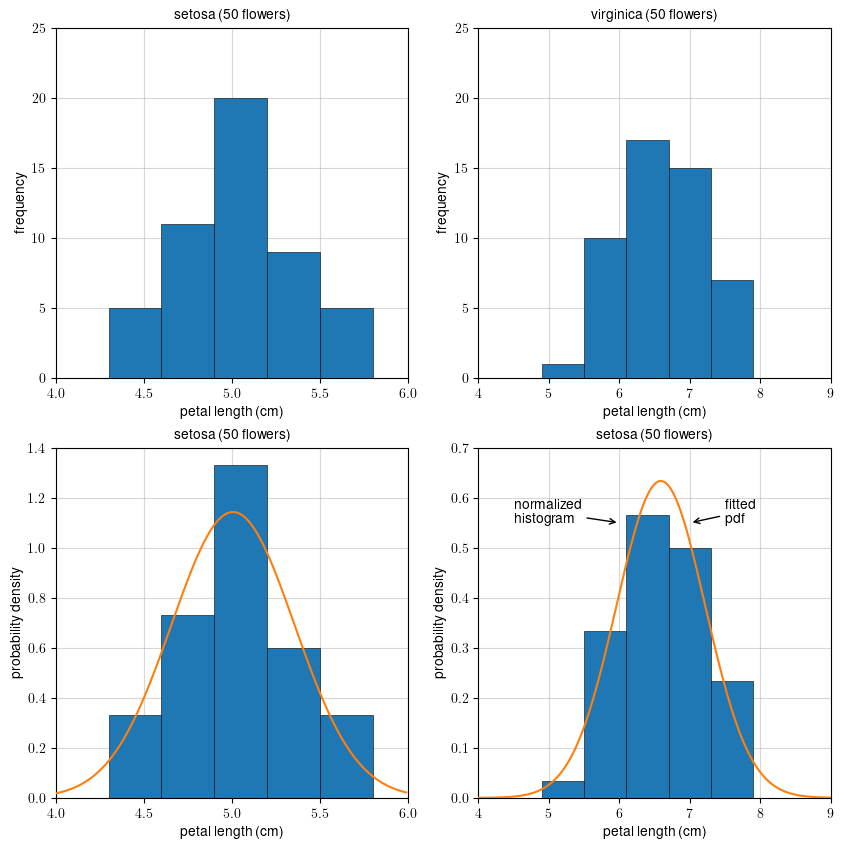

In [3]:
data = scipy.io.loadmat("data/iris_data.mat")["A"] #loaded into variable data
Ntotal = 150 #total number of data points

features = data[0:Ntotal, 0:4] #each row is a feature vector with 4 attributes (petal length, petal width, sepal length, sepal width)
labels = data[0:Ntotal, 4] #entry entry is 0=setosa, 1=versicolor, 2=virginia

#separating features by class

data_0 = data[data[:, 4] == 0]
data_1 = data[data[:, 4] == 1]
data_2 = data[data[:, 4] == 2]

features_0 = data_0[0: Ntotal, 0] #only pedal length
features_1 = data_1[0: Ntotal, 0]
features_2 = data_2[0: Ntotal, 0]

petal = np.concatenate([features_0, features_2])

mean0 = features_0.mean()
var0 = features_0.var()

mean2 = features_2.mean()
var2 = features_2.var()

x = np.arange(3, 9, 0.01)
x0 = np.arange(4, 6, 0.01)
x2 = np.arange(4, 9, 0.01)

#calculating pdfs
f0 = (1/np.sqrt(2*np.pi*var0))*(np.exp(-(x0-mean0)**2/(2*var0))) 
f2 = (1/np.sqrt(2*np.pi*var2))*(np.exp(-(x2-mean2)**2/(2*var2)))
f = 0.5*(1/np.sqrt(2*np.pi*var0))*(np.exp(-(x-mean0)**2/(2*var0))) + 0.5*(1/np.sqrt(2*np.pi*var2))*(np.exp(-(x-mean2)**2/(2*var2)))

#figure 3 (histograms)
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "sans-serif",
    "font.sans-serif": "Helvetica",
})

plt.rcParams['figure.figsize']=10, 10
fig = plt.figure()


ax = fig.add_subplot(221)
ax.hist(features_0, bins=5, zorder=3, edgecolor="black", linewidth=0.4)
ax.set_xlabel("petal length (cm)", fontsize=10)
ax.set_ylabel("frequency", fontsize=10)
ax.set_ylim([0, 25])
ax.set_xlim([4, 6])
ax.set_title("setosa (50 flowers)", fontsize=10)
plt.xticks(np.arange(4, 6.5, 0.5))
plt.grid(zorder=0, alpha=0.5)

ax = fig.add_subplot(222)
ax.hist(features_2, bins=5, zorder=3, edgecolor="black", linewidth=0.4)
ax.set_xlabel("petal length (cm)", fontsize=10)
ax.set_ylabel("frequency", fontsize=10)
ax.set_ylim([0, 25])
ax.set_xlim([4, 9])
ax.set_title("virginica (50 flowers)", fontsize=10)
plt.xticks(np.arange(4, 10, 1))
plt.grid(zorder=0, alpha=0.5)

ax = fig.add_subplot(223)
ax.hist(features_0, bins=5, zorder=2, density=True, edgecolor="black", linewidth=0.4)
ax.plot(x0, f0, zorder=3)
ax.set_xlabel("petal length (cm)", fontsize=10)
ax.set_ylabel("probability density", fontsize=10)
ax.set_ylim([0, 1.4])
ax.set_xlim([4, 6])
ax.set_title("setosa (50 flowers)", fontsize=10)
plt.xticks(np.arange(4, 6.5, 0.5))
plt.grid(zorder=0, alpha=0.5)

ax = fig.add_subplot(224)
ax.hist(features_2, bins=5, zorder=2, density=True, edgecolor="black", linewidth=0.4)
ax.plot(x2, f2, zorder=3)
ax.set_xlabel("petal length (cm)", fontsize=10)
ax.set_ylabel("probability density", fontsize=10)
ax.set_ylim([0, 0.7])
ax.set_xlim([4, 9])
ax.set_title("setosa (50 flowers)", fontsize=10)
plt.xticks(np.arange(4, 10, 1))
plt.grid(zorder=0, alpha=0.5)

ax.annotate("normalized\n histogram", xy=(6, 0.55), xytext=(4.5, 0.55), arrowprops=dict(arrowstyle="->", connectionstyle="arc3"), fontsize=10, fontweight='bold')
ax.annotate("fitted\n pdf", xy=(7, 0.55), xytext=(7.5, 0.55), arrowprops=dict(arrowstyle="->", connectionstyle="arc3"), fontsize=10, fontweight='bold')

plt.show()

**Figure $28.3$** {$\textit{Top}$) Histogram distribution of the petal length measured in cm for iris setosa flowers on the left and for iris virginica flowers on the right. ($\textit{Bottom}$) The same histogram plots are normalized by dividing the value for each bin by the bin size and by the total number of 50 samples to generate approximate probability distributions for the petal length variable. ($\textit{Bottom}$) wo Gaussian distributions are fitted on top of the normalized histograms.

Let $x$ denote the class label, namely, $x=+1$ if the flower is iris setosa and $x=-1$ if the flower is iris virginica. We model the petal length as a random variable $y$. According to the Bayes classifier  (28.28), we need to determine the conditional probability $\mathbb{P}(x=+1|y=5.5)$. To do so, we assume the flowers are equally distributed so that 

$\mathbb{P}(x=+1)=\mathbb{P}(x=-1)=1/2$

According to Bayes rule (3.42b), we have:

$\mathbb{P}(x=x|y=y)=\frac{\mathbb{P}(x=x)\;f_{{y}|x}(y|x=x)}{f_{y}(y)}$

Therefore, we need to evaluate the pdfs $f_{y|x}(y|x)$ and $f_{y}(y)$ that appear on the right-hand side. We do not have these pdfs but we will estimate them from the data measurements by assuming they follow Gaussian distributions. For that purpose, we only need to identify the mean and variance parameters for these distributions; in later chapters, we will learn how to fit more complex distributions into data measurements such as mixtures of Gaussian models.

The sample means and variances for the petal length computed from the respective 50  measurements for each flower type are found to be:

$
\mathbb{E}(\textit{\rm petal length}\,\bigr|\,\textit{\rm flower = setosa}) \approx 5.0060\\
\mathbb{E}(\textit{\rm petal length}\,\bigr|\,\textit{\rm flower = virginica}) \approx 6.5880\\
\textit{\rm var}(\textit{\rm petal length}\,\bigr|\,\textit{\rm flower = setosa}) \approx 0.1242\\
\textit{\rm var}(\textit{\rm petal length}\,\bigr|\,\textit{\rm flower = virginica}) \approx 0.4043
$

where, for example, the sample mean and variance for the setosa flower are computed by using:

$\mathbb{E}(\textit{\rm petal length}\,\bigr|\,\textit{\rm flower = setosa})
\approx \frac{1}{50}\sum_{n=1}^{50} y_n \overset{\Delta}{=} \bar{y}_{\rm setosa}\\
\textit{\rm var}(\textit{\rm petal length}\,\bigr|\,\textit{\rm flower = setosa})\approx\frac{1}{49}\sum_{n=1}^{50} (y_n-\bar{y}_{\rm setosa})^2
$

Here, the sum is over the 50 setosa samples and $y_n$ is the petal length for the $n$ th setosa sample.

The bottom row in Fig. 28.3 shows two Gaussian distributions with these means and variances fitted on top of the histograms. These are used as approximations for the conditional pdfs $f_{{y}|x}(y|x=x),$ namely,

$
f_{{y}|x}(y|x=\textit{\rm setosa})=\frac{1}{\sqrt{2\pi\times 0.1242}}\textit{\rm exp}\left\{-\frac{1}{2\times 0.1242}(y-5.0060)^2\right\}\\
f_{{y}|x}(y|x=\textit{\rm virginica})=\frac{1}{\sqrt{2\pi\times 0.4043}}\textit{\rm exp}\left\{-\frac{1}{2\times 0.4043}(y-6.5880)^2\right\}
$

The combined distribution for the petal length variable can then be approximated by

$f_{{y}}(y)=\frac{1}{2}\frac{1}{\sqrt{2\pi\times 0.1242}}\textit{\rm exp}\left\{-\frac{1}{2\times 0.1242}(y-5.0060)^2\right\}+\frac{1}{2}\frac{1}{\sqrt{2\pi\times 0.4043}}\textit{\rm exp}\left\{\frac{1}{2\times 0.4043}(y-6.5880)^2\right\}$

since it is equally likely for a petal length to arise from one Gaussian distribution or the other. Figure~\ref{fig43-haasxasxNNNN} shows the normalized histogram distribution for all 100 petal lengths and fits the sum of two Gaussian distributions on top of it.

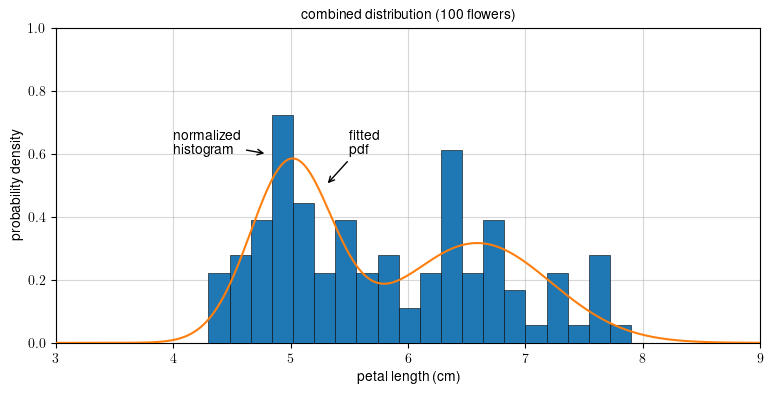

Threshold: 0.7467895622843346


In [4]:
#figure  4 (pdf)
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "sans-serif",
    "font.sans-serif": "Helvetica",
})

plt.rcParams['figure.figsize']=20, 9
fig = plt.figure()


ax = fig.add_subplot(221)
ax.hist(petal, bins=20, zorder=3, edgecolor="black", linewidth=0.4, density=True)
ax.plot(x, f, zorder=3)
ax.set_xlabel("petal length (cm)", fontsize=10)
ax.set_ylabel("probability density", fontsize=10)
ax.set_ylim([0, 1])
ax.set_xlim([3, 9])
ax.set_title("combined distribution (100 flowers)", fontsize=10)

ax.annotate("normalized\n histogram", xy=(4.8, 0.6), xytext=(4, 0.6), arrowprops=dict(arrowstyle="->", connectionstyle="arc3"), fontsize=10, fontweight='bold')
ax.annotate("fitted\n pdf", xy=(5.3, 0.5), xytext=(5.5, 0.6), arrowprops=dict(arrowstyle="->", connectionstyle="arc3"), fontsize=10, fontweight='bold')

plt.xticks(np.arange(3, 10, 1))
plt.grid(zorder=0, alpha=0.5)

plt.show()

#Calculating the Bayes classifier threshold
#Different than the solution in the original MatLab code and in the book. 
#In the original MatLab code the variables aux multiply rather than divide. d

'''
    The threshold solution presented here is different than the solution in the original MatLab code and in the book.
    In the original MatLab code the variables 'aux' multiply rather than divide.
'''

point = 5.5
aux = np.sqrt(2*np.pi*var0)
f1 = (1/aux)*np.exp(-(1/(2*var0))*(point-mean0)**2) #In original MatLab code f1 = (aux)*np.exp(-(1/(2*var0))*(point-mean0)**2)

aux = np.sqrt(2*np.pi*var2)
f2 = (1/aux)*np.exp(-(1/(2*var2))*(point-mean2)**2) #In original MatLab code f2 = (aux)*np.exp(-(1/(2*var2))*(point-mean2)**2)

f = .5*f1 + .5*f2

threshold = .5*f1/f

'''
    Due to the corretion, the conclusion of the example was changed, instead of being classificated of the iris virginica type,
    we classify the flower as being of the iris setosa type because the threshold is greater than 1/2. 
    In the book the flower is classified as virginica since the probability calculated was 0.4730 (less than 1/2).
'''

print(f"Threshold: {threshold}")

**Figure $28.4$** Combined normalized histogram for the distribution of the petal length measured in centimeters for both classes of iris setosa and iris virginica flowers. The sum of two Gaussian distributions is fitted on top of the histogram.

We now have all the elements needed to evaluate the right-hand side of (28.58) for the given petal length of $y=5.5$ cm. Indeed,

$\mathbb{P}(x=\textit{\rm setosa}|y=5.5)=\frac{\mathbb{P}(x=\textit{\rm setosa})\;f_{{y}|x}(y=5.5|x=\textit{\rm setosa})}{f_{y}(y=5.5)}\\
=\frac{0.5\times 0.4197}{0.2810}\approx 0.7467$

This value is greater than $1/2$ and we therefore classify the flower as being of the iris setosa type.

The results presented in this notebook are different than in the book due to a mistake in the original MatLab code when calculating the conditional pdfs $f_{{y}|x}(y=5.5|x=\textit{\rm setosa})$ and $f_{y}(y=5.5)$. With this, the classification result has changed. (Notebook author: Eduardo Faria Cabrera)

In the book:

$\mathbb{P}(x=\textit{\rm setosa}|y=5.5)=\frac{\mathbb{P}(x=\textit{\rm setosa})\;f_{{y}|x}(y=5.5|x=\textit{\rm setosa})}{f_{y}(y=5.5)}\\
=\frac{0.5\times 0.3309}{0.3498}\approx 0.4730$

Which would classify the flower as being of the iris virginica type.


## Figure 28.6

Figure 28.6 illustrates the logistic functions $1/(1+e^{-z})$ and $1/(1+e^z)$. Note that these functions return values between $0$ and $1$ (as befits a true probability measure).

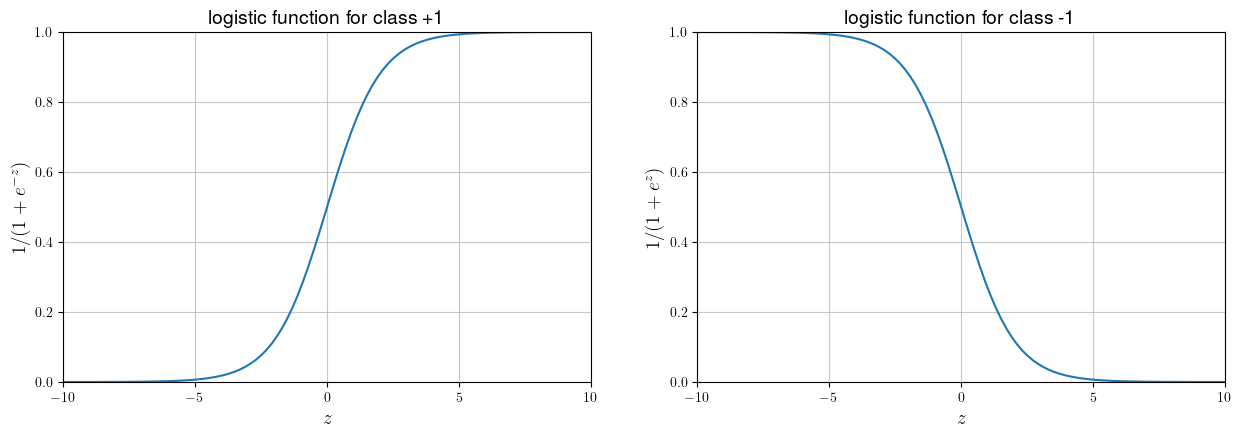

In [5]:
#generating figure 6 (sigmoidal functions)
x = np.linspace(-10, 10, 100)

f1 = 1/(1+np.exp(-x))
f2 = 1/(1+np.exp(x))

#figure 6 (sigmoidal functions)
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "sans-serif",
    "font.sans-serif": "Helvetica",
})

plt.rcParams['figure.figsize']=15, 10
fig = plt.figure()

ax = fig.add_subplot(221)
ax.plot(x, f1)
ax.set_xlabel(r'$z$', fontsize=14)
ax.set_ylabel(r'$1/(1+e^{-z})$', fontsize=14)
ax.set_ylim([0, 1])
ax.set_xlim([-10, 10])
plt.xticks(np.arange(-10, 15, 5))
ax.grid(alpha=0.7)
ax.set_title('logistic function for class +1', fontsize=14)

ax = fig.add_subplot(222)
ax.plot(x, f2)
ax.set_xlabel(r'$z$', fontsize=14)
ax.set_ylabel(r'$1/(1+e^z)$', fontsize=14)
ax.set_ylim([0, 1])
ax.set_xlim([-10, 10])
plt.xticks(np.arange(-10, 15, 5))
ax.grid(alpha=0.7)
ax.set_title('logistic function for class -1', fontsize=14)

plt.show()

**Figure $28.6$** Typical behavior of logistic functions for two classes. The figure shows plots of the functions $1/(1+e^{-z})$ ($\textit{left}$) and $1/(1+e^z)$ ($\textit{right}$) assumed to correspond to classes +1 and -1, respectively.